In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

Define variables for $| 0 \rangle$, $| 1 \rangle$, $| 0 \rangle\langle 0 |$, and $| 1 \rangle\langle 1 |$, and a function to compute $\varphi_1 \otimes \varphi_2 \otimes ... \otimes\varphi_n$.

In [2]:
#Initialising arrays
Zero = np.array([[1], [0]])
One = np.array([[0], [1]])

#Dot product '.T' transposes the array
P0 = np.dot(Zero, Zero.T)
P1 = np.dot(One, One.T)

def otimes(*args):
    #Method which form Kronecker product on the matrix based on input arguments given
    result = np.array([[1.0]])
    for op in args:
        #Performing Kronecker product 
        result = np.kron(result, op)
    return result

Define:

$$|\varphi\rangle = \bigotimes_{k=n-1,\ldots,0} \frac{1}{\sqrt{2}} \left(  |0\rangle + \exp(2\pi i 2^k \varphi) |1\rangle \right)$$

and the Quantum Fourier transform $F_N$:

$$F_N = \frac{1}{\sqrt{N}} \sum_{k,\ell\in[N]} \omega^{k\cdot \ell} |k\rangle\langle\ell|$$

where:

$n=2^N$, $[N] = {0,1,...,N-1}$, and $\omega=e^{2\pi i / N}$

In [3]:
def ket_phi(phi, n):
    #initialising result array
    result = np.array([[1]])
    
    #Applying formula with decreament in k (Reverse loop)
    for k in reversed(xrange(n)):
        #Applying above given formula
        e = np.exp(2*np.pi*1j*(2**k)*phi)
        
        #computing result
        result = otimes(result,  1/np.sqrt(2) * (Zero + e * One))
    return result

def F(N):
    #outer product
    k_times_l = np.outer(np.arange(N), np.arange(N))
    
    #Computing the final value
    a = 1/np.sqrt(N)
    b = np.exp(2*np.pi*1j/N * k_times_l)
    F = a * b
    return F

In [4]:
# now the main thing:
#initialisng constants and variables
n = 5
N = 2**n
phi = 12.3/32.

#Applying dot product on conjugate of F(N) and the matrix returned by ket_phi(phi,n)
psi = np.dot(np.conj(F(N)).T, ket_phi(phi, n))

# method 1 for measurment, directly using slide 72
p_x = []

#Repeat N times
for i in xrange(N):
    bin_str = ('{0:0'+str(n)+'b}').format(i)
    
    #compute param to be passed to otimes method
    x = [(P0 if j=='0' else P1) for j in bin_str]
    
    #call to otimes method with computed x
    P_b = otimes(*x)
    
    #Squaring the elements, we have to do it N times in loop
    p_i = np.square(np.linalg.norm(np.dot(P_b, psi)))
    p_x.append(p_i)
    
# method 2
# p_x = np.dot(psi, psi.conj().T)
# p_x = np.real(np.diag(p_x)) # remove small imaginary values due to calculation error.

Plotting the probability distribution:

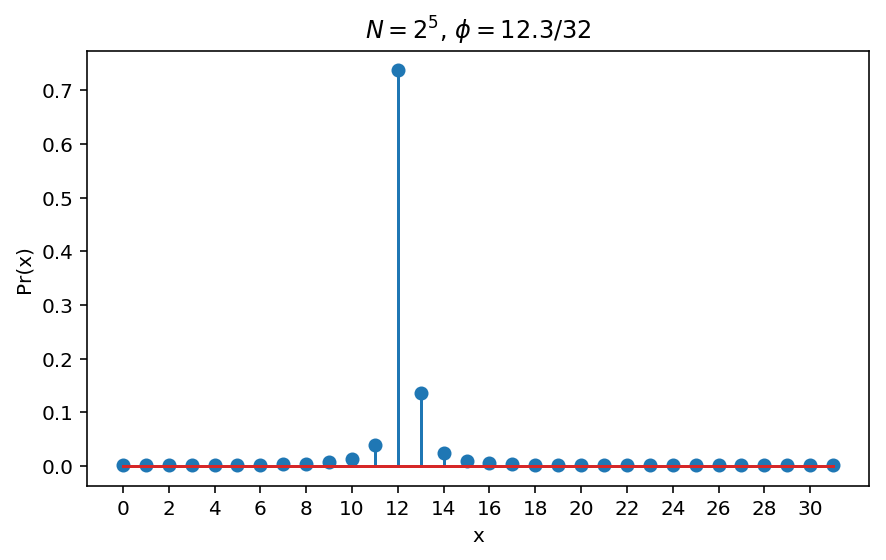

In [5]:
#plotting the graphs
plt.figure(figsize=(7, 4))
plt.stem(np.arange(N), p_x)
plt.xticks(np.arange(0, N, 2))
plt.xlabel('x')
plt.ylabel('Pr(x)')
plt.title('$N=2^{%d}$, $\phi=%g/%d$'%(n, phi*N, N)) 
plt.show()